# Multivariate Gaussian Mixture Intution
This Notebooks is about Multivariate Gaussian Mixture. We will generetate some Multivariate Gaussians and then create a mixture of them. This will help us visualise the distibution of the gaussian and then the mixture. 

We will only create 2-D gaussians because it will not be possible to visualise 3-D+ gaussians.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

## Create Gaussians
Lets create a Gaussian fclass, with the needed parameters and a pdf function.

In [2]:
class Gaussian :
    def __init__(self, Mu, Sigma, D, pi_contribution = 1):
        self.Mu = Mu
        self.Sigma = Sigma
        self.D = D
        self.pi_contribution = pi_contribution
        

    def probability(self, X):
        assert X.shape[0] == self.D
        normalising_factor = 1 / (((2 * np.pi) ** (self.D / 2)) * (np.linalg.det(self.Sigma) ** (1 / 2)))
        exponent = -0.5 * np.dot(np.dot((self.Mu - X), np.linalg.inv(self.Sigma)), (self.Mu - X).T)
        return normalising_factor * np.exp(exponent) * self.pi_contribution

## Visualise Gaussians
1 D and 2 D gaissians can be visualised using the plot function. Here our gaussian is 2D, and the best way to visualise it is to use the contour plots or some 3D plots. 
Lets first see the contour plot, and how our gaussian looks like.

In [8]:
def generateCountour (Mu, Sigma, D, pi_contribution = 1.0, n_samples = 100):
    """
    Generates data for contour plot of the Gaussian distribution
    Args:
        Mu: Means of the Gaussian distribution
        Sigma: Covariance matrix of the Gaussian distribution
        D: Dimension of the Gaussian distribution
        n_samples: Number of samples to generate
    Returns:
        X: Generated samples
        Z: Generated samples projected onto the contour plot

    """
    # create points from mean - 3*Sigma to mean + 3*Sigma
    x1 = np.linspace(Mu[0] - 3 * Sigma[0][0], Mu[0] + 3 * Sigma[0][0], n_samples)
    x2 = np.linspace(Mu[1] - 3 * Sigma[1][1], Mu[1] + 3 * Sigma[1][1], n_samples)
    X1, X2 = np.meshgrid(x1, x2)
   
    Z = np.zeros((n_samples, n_samples))
    gaussian = Gaussian(Mu, Sigma, D, pi_contribution = pi_contribution)
    for i in range(n_samples):
        for j in range(n_samples):
            X = np.array([X1[i][j], X2[i][j]])
            Z[i][j] = gaussian.probability(X)
    return X1, X2, Z


We can use the above function to convinently plot the gaussians with different means and variances. We can then visualise the effect of the means and variances on the gaussian. 
We have plotted here some of the examples

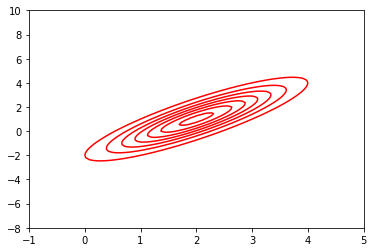

In [9]:
X1, X2,  Z = generateCountour(np.array([2, 1]), np.array([[1, 1.5], [1.5, 3]]), 2)
plt.contour(X1, X2, Z, colors='r')
plt.show()

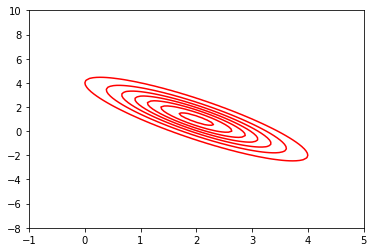

In [11]:
X1, X2,  Z = generateCountour(np.array([2, 1]), np.array([[1, -1.5], [-1.5, 3]]), 2)
plt.contour(X1, X2, Z, colors='r')
plt.show()

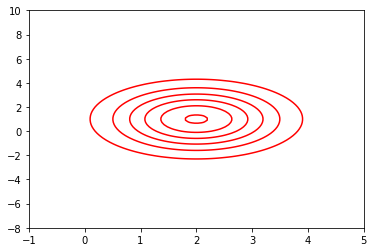

In [12]:
X1, X2,  Z = generateCountour(np.array([2, 1]), np.array([[1, 0], [0, 3]]), 2)
plt.contour(X1, X2, Z, colors='r')
plt.show()

## High Level understanding of the Gaussian Mixture
Gaussian mixture is a way of combining multiple gaussians into one. To visualise how a pdf of a gaussian mixture looks like, we can use the contour plot as well. First we will create 3 gaussians and then we will combine them.

We will use the similar contour plots to visualise them.

Text(5, 8, '0.3')

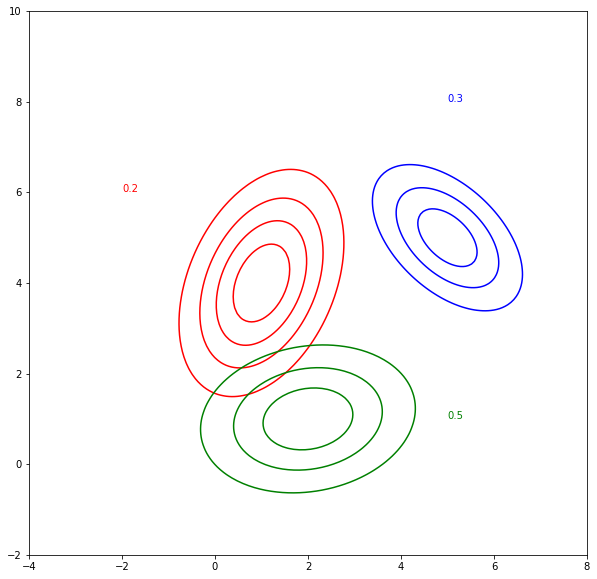

In [10]:
# lets generate 3 gaussians with nearby means and different covariance matrices
lamdas = [0.2, 0.5, 0.3]
X11, X12, Z1 = generateCountour(np.array([1, 4]), np.array([[1, 0.5], [0.5, 2]]), 2, lamdas[0])
X21, X22, Z2 = generateCountour(np.array([2, 1]), np.array([[2, 0.2], [0.2, 1]]), 2, lamdas[1])
X31, X32, Z3 = generateCountour(np.array([5, 5]), np.array([[1, -0.5], [-0.5, 1]]), 2, lamdas[2])
# create a figure plot ans store it in a variable
plt.figure(figsize=(10, 10))
# plot them on the same plot
plt.contour(X11, X12, Z1, colors='r', levels=4)
plt.contour(X21, X22, Z2, colors='g', levels=4)
plt.contour(X31, X32, Z3, colors='b', levels=4)
# mrite the lambda values
plt.text(-2, 6,  str(lamdas[0]), color='r')
plt.text(5, 1, str(lamdas[1]), color='g')
plt.text(5, 8,  str(lamdas[2]), color='b')




So we have created 3 gaussians, and we can see how they look like. We have plot the contour with the respective priors written beside it , so that we can relate the plot with the joint pdf plots better.

## Gaussian Mixture
So gaussian mixture is basically sum of the pdfs of the gaussians multiplied with their respective mixing coefficients.

In [ ]:
class GaussianMixture:
    def __init__(self, gaussians):
        self.gaussians = gaussians
        self.N = len(gaussians)
    
    def probability(self, X):
        """
        Calculates the probability of the data X belonging to the mixture of Gaussians
        Args:
            X: Data to be classified
        Returns:
            Probability of the data belonging to the mixture of Gaussians
        """
        assert X.shape[0] == self.gaussians[0].D
        probabilities = np.zeros(self.N)
        for i in range(self.N):
            probabilities[i] = self.gaussians[i].probability(X)*self.gaussians[i].lamda
        return np.sum(probabilities) 
        

Similar to the gaussian, we created the function for the gaussian mixture, to easilt generate contour plots.

In [ ]:
def generateCountourMixture(MuArray, SigmaArray, D,  lamdas, n_samples):
    
    # find the x1min, x1max, x2min, x2max based on the means and covariances
    x1min = np.min(MuArray[:, 0] - 3 * SigmaArray[:, 0, 0])
    x1max = np.max(MuArray[:, 0] + 3 * SigmaArray[:, 0, 0])
    x2min = np.min(MuArray[:, 1] - 3 * SigmaArray[:, 1, 1])
    x2max = np.max(MuArray[:, 1] + 3 * SigmaArray[:, 1, 1])
    # create points from mean - 3*Sigma to mean + 3*Sigma
    x1 = np.linspace(x1min, x1max, n_samples)
    x2 = np.linspace(x2min, x2max, n_samples)
    X1, X2 = np.meshgrid(x1, x2)

    # create mixture of gaussians
    mixture = GaussianMixture([Gaussian(Mu, Sigma, D, lamda) for Mu, Sigma, lamda in zip(MuArray, SigmaArray, lamdas)])
    Z = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            X = np.array([X1[i][j], X2[i][j]])
            Z[i][j] = mixture.probability(X)
    return X1, X2, Z

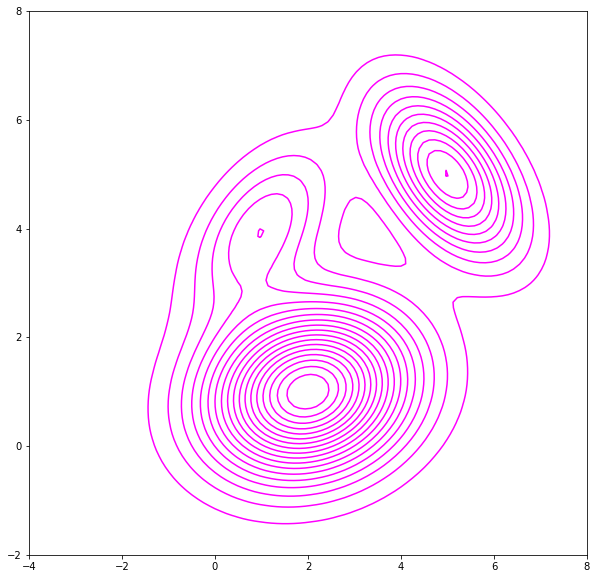

In [ ]:
Means = np.array([[1, 4], [2, 1], [5, 5]])
Sigmas = np.array([[[1, 0.5], [0.5, 1]], [[2, 0.2], [0.2, 1]], [[1, -0.5], [-0.5, 1]]])
X1mix, X2mix, Zmix = generateCountourMixture(Means, Sigmas, 2, [0.2, 0.5, 0.3], 100)
plt.figure(figsize=(10, 10))
plt.contour(X1mix, X2mix, Zmix, colors='magenta', levels = 20)
plt.show()

So the above contour plot of the mixture seems complicated, but we can still visualise the 3 different gaussians, mixing up to form the mixture.

<ipython-input-11-5ad21415ff7a>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


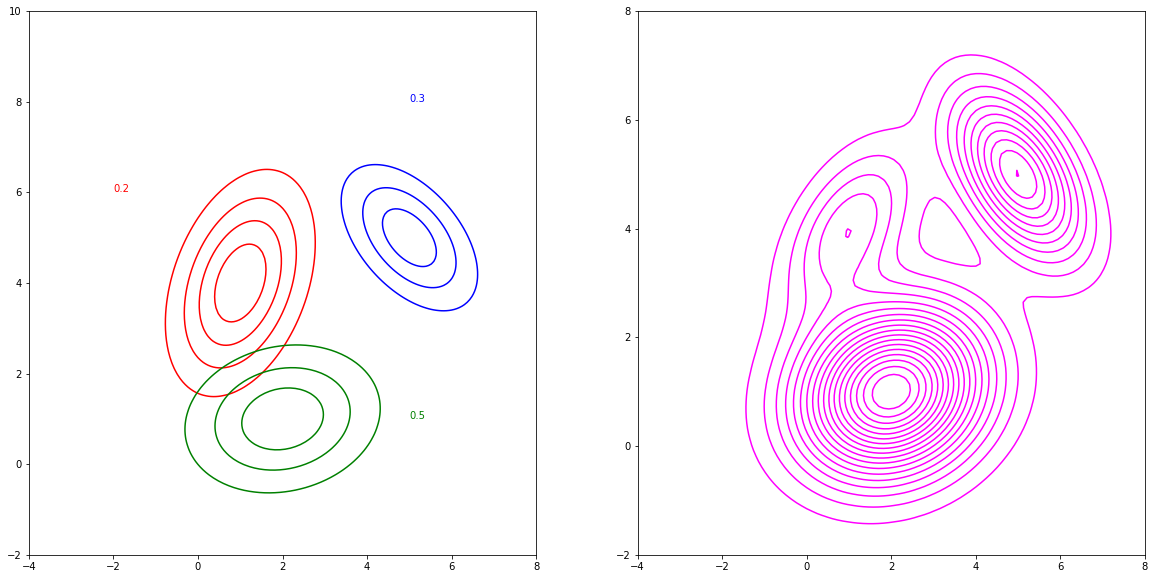

In [ ]:
# lets see and compare both plots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].contour(X11, X12, Z1, colors='r', levels=4)
axs[0].contour(X21, X22, Z2, colors='g', levels=4)
axs[0].contour(X31, X32, Z3, colors='b', levels=4)
axs[0].text(-2, 6,  str(lamdas[0]), color='r')
axs[0].text(5, 1, str(lamdas[1]), color='g')
axs[0].text(5, 8,  str(lamdas[2]), color='b')
axs[1].contour(X1mix, X2mix, Zmix, colors='magenta', levels = 20)
plt.show()



We can compare the above images better side by side. One thing we can notice how prior is effecting the pdfs for the mixture, as the contours for the red gaussian are much less as its prior is 0.2 while for the green there are much more countours as its prior is 0.5.

Instead of countours, we can also plot a 3D plot of the gaussian mixture. We can sue a surface plot to visualise the pdfs of the gaussian mixture. We have used matplotlib to plot the surface plot. We have also plotted a interactive 3D plot of the pdf of the GMM using plotly.

In [ ]:
# plot a surface plot using seaborn

# use same data as before X1mix, X2mix, Zmix
fig = plt.figure(figsize=(10, 10))
ax = fig.insert_subplot(111, projection='3d')
ax.plot_surface(X1mix, X2mix, Zmix, cmap='viridis', edgecolor='none')
plt.show()





In [ ]:
# plot a 3d interactive surface plot using plotly
# use same data as above
fig = go.Figure(data=go.Surface(x=X1mix, y=X2mix, z=Zmix))

fig.update_layout(
   
    width=600,
    height=600,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig.show()




## Generating sample from the gaussian mixture
As we were needed to generate samples from the gaussian mixture, we created a function to generate samples from the gaussian mixture. We have implemented it from scratch.
To generate the sample we have used Box Muller method to generate a standard normal random variable. We have used Choelsky method to generate the sample from the gaussian mixture.

We have refered this [video](https://www.youtube.com/watch?v=DSWM7-9gK7s) for the implementation of the Box Muller method.

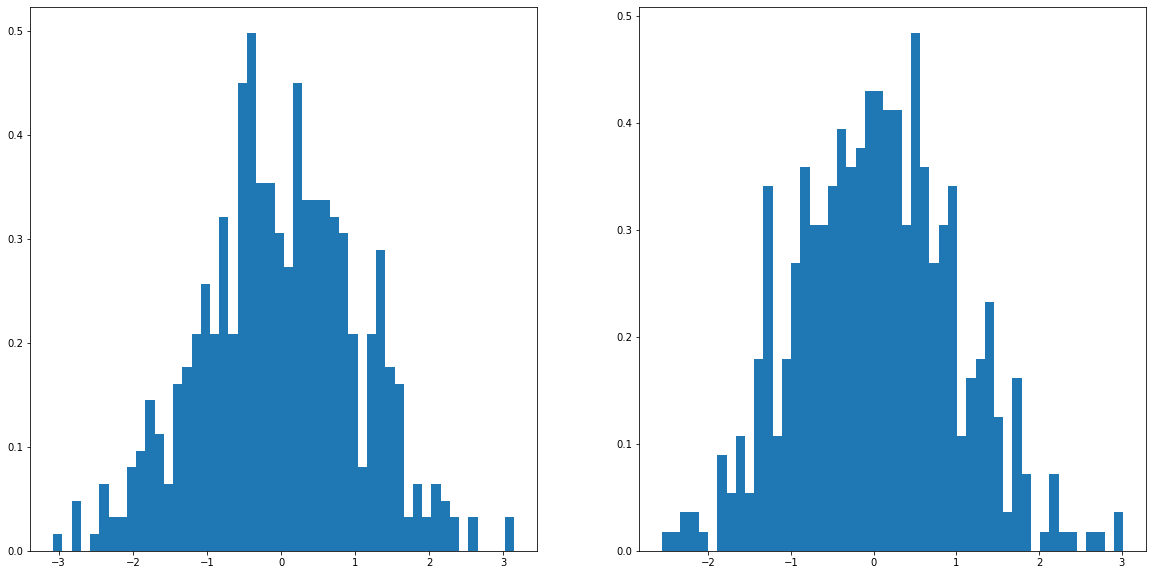

In [ ]:
# firts lets write the logic to sample numbes from a standard normal distribution
from random import random
from math import log, cos, sin, sqrt, pi
def sample_standard_normal():
    mu = 0
    sigma = 1
    # we will write our own implementation of np.random.normal()
    # we will use the Box-Muller transform
    r = sqrt(-2*log(random()))
    a = 2*pi*random()
    return sigma*r*cos(a) + mu, sigma*r*sin(a) + mu
  
x = []
for _ in range(500):
    x.append(sample_standard_normal())


x = np.array(x)
x1 = x[:, 0]
x2 = x[:, 1]
# pot histogram and kde using seaborn
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].hist(x1, bins=50, density=True)
axs[1].hist(x2, bins=50, density=True)
plt.show()


In [ ]:
df = pd.DataFrame(x, columns=['x1', 'x2'])
df.describe()

x1          x2
count  500.000000  500.000000
mean    -0.027904    0.040651
std      1.055322    0.953470
min     -3.072977   -2.559945
25%     -0.712032   -0.625756
50%     -0.056698    0.041178
75%      0.677942    0.668864
max      3.147770    3.017203

So we can see we have generate 2 set of 500 samples whos mean is near 0 and variance is near 1. So our implementation of the Box Muller method is working fine. We will build on it to generate samples from desired gaussian.

In [ ]:
def cholesky(m):
    # find L of m using cholesky decomposition
    L = np.zeros(m.shape)
    for i in range(m.shape[0]):
        L[i][i] = sqrt(m[i][i] - np.sum(L[i][:i]**2))
        for j in range(i+1, m.shape[0]):
            L[j][i] = (m[j][i] - np.sum(L[j][:i]*L[i][:i]))/L[i][i]
    return L
    

In [ ]:
# create a gaussian variable with given mean and covariance by using the standard normal distribution
def createGaussianSamples (mean, covariance, N = 500):
    X = []
    for _ in range(N):
        X.append(sample_standard_normal())
    X = np.array(X)
    # get L amtrix from covariance matrix
    L = cholesky(covariance)
    # get the samples from the gaussian distribution
    samples = np.array([np.dot(L, x) + mean for x in X])
    return samples



## Testing the sample generation method
So we have created a function to generate samples from the gaussian mixture. To test if the method is working fine, lets generate some samples for  certain means and covariance. We will then plot a histogram and heatmaps of the samples to visualise the distribution.

In [ ]:
samples = createGaussianSamples(np.array([3, 4]), np.array([[1, 0.5], [0.5, 1]]), 50000)
print(samples.shape)

(50000, 2)


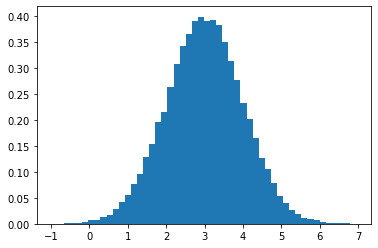

In [ ]:
plt.hist(samples[:, 0], bins=50, density=True)
plt.show()

So we can see that the distrubution seem to be of the gaussian with mean and variance for the first feature. This is basically a marginal distribution.

Now to see the distribution of the complete 2 featured gaussian, lets plot a heat map of the samples.

In [ ]:
# lets plot a 2d histogram
# plot 2d histogram using plotly
fig = go.Figure(data=go.Histogram2d(x=samples[:, 0], y=samples[:, 1], nbinsx=100, nbinsy=100))
fig.update_layout(
    width=600,
    height=600,
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=30
    )
)
fig.show()

The sample genration function seems to work correctly as evident from the heat map. As we can compare the means and the nature of covariance matrix.

## Generating samples from our distribution
Now use the sample generation function to generate samples from our previous gaussians mixtures. Here we will generate 500 samples in total, each class will have samples based on their mixing coefficients. 

In [ ]:
# generating data for our mixture
means = np.array([[1, 4], [2, 1], [5, 5]])
covariances = np.array([[[1, 0.5], [0.5, 1]], [[2, 0.2], [0.2, 1]], [[1, -0.5], [-0.5, 1]]])
lamdas = [0.2, 0.5, 0.3]
sampleSizes = np.array(lamdas)*500

samples0 = createGaussianSamples(means[0], covariances[0], int(sampleSizes[0]))
samples1 = createGaussianSamples(means[1], covariances[1], int(sampleSizes[1]))
samples2 = createGaussianSamples(means[2], covariances[2], int(sampleSizes[2]))

# insert cluster label as column to the samples
samples0 = np.concatenate((samples0, np.zeros(samples0.shape[0]).reshape(-1, 1)), axis=1)
samples1 = np.concatenate((samples1, np.ones(samples1.shape[0]).reshape(-1, 1)), axis=1)
samples2 = np.concatenate((samples2, 2*np.ones(samples2.shape[0]).reshape(-1, 1)), axis=1)

# concatenate all samples
samples = np.concatenate((samples0, samples1, samples2), axis=0)

# create a dataframe from the samples
df = pd.DataFrame(samples, columns=['x1', 'x2', 'cluster'])

# shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df['cluster'] = df['cluster'].astype('int')
# see the count of each cluster
df['cluster'].value_counts()

1    250
2    150
0    100
Name: cluster, dtype: int64

Lets store the sample generated from the gaussian mixture in a dataframe

In [ ]:
df.head()

x1        x2  cluster
0  2.464459  1.010149        1
1  0.430351  3.342596        0
2  2.759238  0.348066        1
3  0.844807  0.770452        0
4  2.162873  5.509802        0

### Calculating the probabilities of the samples to belong to each class
Now once the sample is generated we will calculate the probability of the sample to belong to each class and store in the same dataframe. This will help us have a idea of soft assignment. Note that we also have stored the cluster from which the sample was generated while the time of generating.

In [ ]:
# find probabiloty of each data point to exist in each sample using the gaussian distribution
gaussian0 = Gaussian(means[0], covariances[0], 2, lamda=lamdas[0])
gaussian1 = Gaussian(means[1], covariances[1], 2, lamda=lamdas[1])
gaussian2 = Gaussian(means[2], covariances[2],2, lamda=lamdas[2])

# insert three columns of zeros to the dataframe named prob0 to prob2
df['prob0'] = 0
df['prob1'] = 0
df['prob2'] = 0
df['sumProb'] = 0
# fill prob0 - prob2 with the probability of each data point to exist in each sample
for i in range(df.shape[0]):
    df.loc[i, 'prob0'] = gaussian0.probability(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))
    df.loc[i, 'prob1'] = gaussian1.probability(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))
    df.loc[i, 'prob2'] = gaussian2.probability(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))

    df.loc[i, 'sumProb'] = df.loc[i, 'prob0'] + df.loc[i, 'prob1'] + df.loc[i, 'prob2']
    # normalize the probabilities so that it sums to 1
    df.loc[i, 'prob0'] = df.loc[i, 'prob0']/df.loc[i, 'sumProb']
    df.loc[i, 'prob1'] = df.loc[i, 'prob1']/ df.loc[i, 'sumProb']
    df.loc[i, 'prob2'] = df.loc[i, 'prob2']/ df.loc[i, 'sumProb']

    df.loc[i, 'sumProb'] = df.loc[i, 'prob0'] + df.loc[i, 'prob1'] + df.loc[i, 'prob2']


In [ ]:
df.head()

x1        x2  cluster         prob0     prob1         prob2  sumProb
0  2.464459  1.010149        1  2.277973e-05  0.999977  4.083879e-10      1.0
1  0.430351  3.342596        0  9.574191e-01  0.042581  1.713246e-09      1.0
2  2.759238  0.348066        1  2.360988e-07  1.000000  2.687850e-11      1.0
3  0.844807  0.770452        0  1.191958e-03  0.998808  7.367256e-16      1.0
4  2.162873  5.509802        0  9.486171e-01  0.000171  5.121198e-02      1.0

So now we have calulated the probability of the sample to belong to each class and also normalized the probabilities.

### Generating the soft assignment plots
Unlike K means in which we had to assign the samples to the nearest cluster, here we have the probabilities of the samples to belong to each class. So we can use the soft assignment to assign the samples to the clusters.

For that here we have generated 3 plots.
1. First shows the points and their color is based on the cluster they were generated from, which we had stored in the dataframe.
2. All the points with no cluster information.
3. All the points with the R G and B values based on their probability to belong to each class.

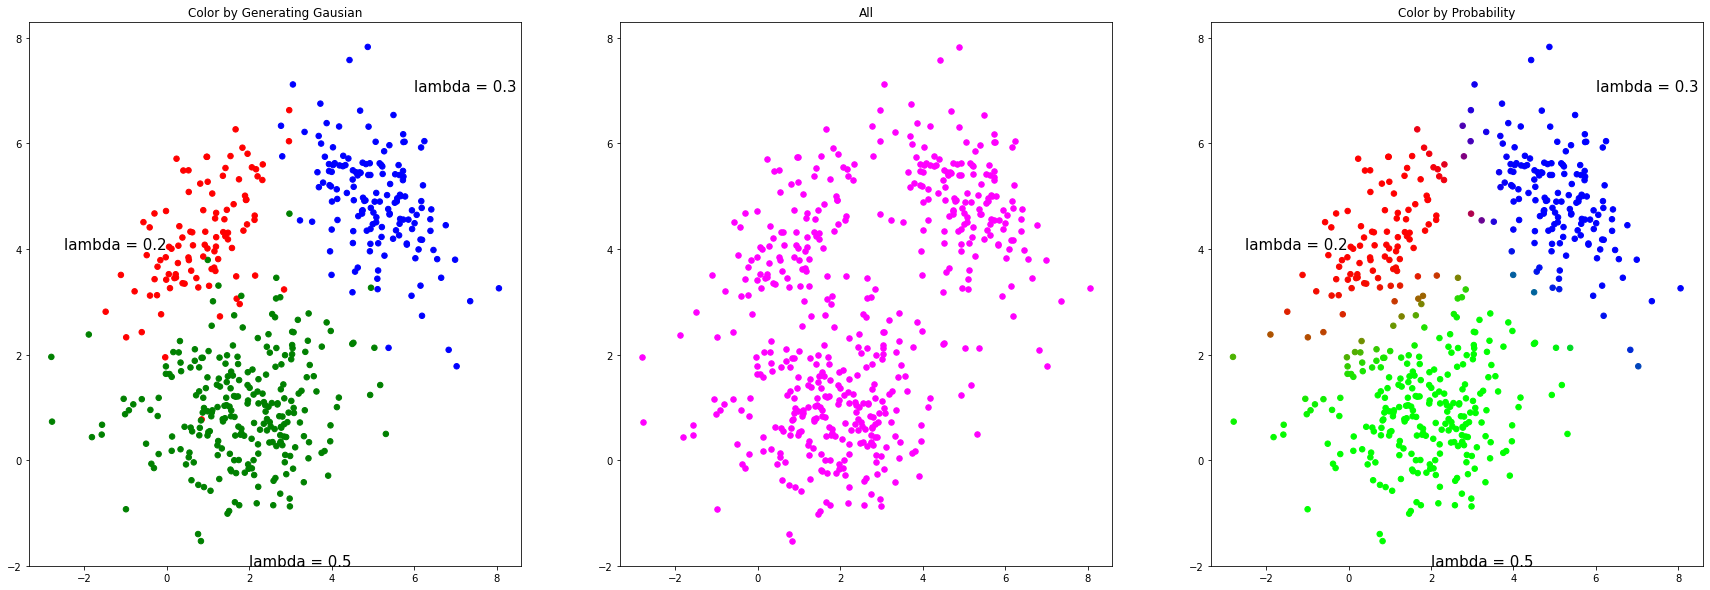

In [ ]:
# plot 3 plots 
# 1 a scatter plot of the data with colors as the cluster label
# 2 a scatter plot of all data
# 3 a scatter plot with rgb values for each data point based on the probabilities

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# plot 1 
# use r g b values to color the points
rgb = np.array(['red', 'green', 'blue'])
ax[0].scatter(df['x1'], df['x2'] , c=rgb[df['cluster'].values], s=30)
ax[0].set_title('Color by Generating Gausian')

# plot 2
ax[1].scatter(df['x1'], df['x2'],c='magenta', s=30)
ax[1].set_title('All')

# insert a color label of rgb value to the dataframe based on prob0-prob2
df['rgb'] = df.apply(lambda row: [row['prob0'], row['prob1'], row['prob2']], axis=1)
# plot 3
ax[2].scatter(df['x1'], df['x2'], c=df['rgb'], s=30)
ax[2].set_title('Color by Probability')

# mark lambda values on the plot 1 and 3
ax[0].text(-2.5, 4, 'lambda = ' + str(lamdas[0]), fontsize=15)
ax[0].text(2, -2, 'lambda = ' + str(lamdas[1]), fontsize=15)
ax[0].text(6, 7, 'lambda = ' + str(lamdas[2]), fontsize=15)

ax[2].text(-2.5, 4, 'lambda = ' + str(lamdas[0]), fontsize=15)
ax[2].text(2, -2, 'lambda = ' + str(lamdas[1]), fontsize=15)
ax[2].text(6, 7, 'lambda = ' + str(lamdas[2]), fontsize=15)
# turn off the grid
for i in range(3):
    ax[i].grid(False)




The most important figure here is the 3rd plot. It shows the points with the R G and B values based on their probability to belong to each class. So we can see points which are near to both red and green have a color with a combination of red and green. Same for other pairs of colors, while the points which are deep inside their respective gaussians have a color which is very close to pure R G or B.